# Hypothesis testing on Apple Store apps and Google Play apps:

This project is to carry out a hypotheisis testing on Apple Store apps and Google Play apps to see **whether Apple Store apps receive better ratings than Google Play apps?**

### Stages of the project:

1. Data loading from datasource <br>
    * Load two datasets
    * Subsetting the data with columns those we need <br><br> 
2. Cleaning, transforming and visualizing
    * Check data types and fix them
    * Add one `platform` column to both the `Apple` and the `Google` dataframes
    * Changing column names to prepare for a join 
    * Join both datasets
    * Eliminate `NaN` values
    * Filter and keep only those apps that have been reviewed at least once
    * Summarize rating visually and analytically (by the column `platform`) <br><br> 
3. Modelling 
    * Hypothesis formulation
    * Getting distribution of the data
    * Permutation test <br><br>
4. Evaluating and concluding 
    * What is our conclusion?
    * What is our decision?
    * List of other models. 
    

### Permutation test for Hypothesis testing:
Permutation tests (also called randomization tests) are nonparametric test procedures to test the null hypothesis that two different groups come from the same distribution. A permutation test can be used for significance or hypothesis testing (including A/B testing) without requiring to make any assumptions about the sampling distribution (e.g. it doesn't require the samples to be normal distributed).

**Permutation Test Mechaninsm:**<br>
**$ H_{0} $** (null hypothesis): The treatment is same as control. <br>
**$ H_{1} $** (alternative test): The treatment is not same as control group. <br>
Here, any permutations are equally likely. There will be $ (n+m)! $ permutations, where $ n $ is the number of records in the treatment sample, and $ m $ is the number of records in the control sample).

1. Compute the difference (for this case study: mean) of sample  $ x $ and sample $ y $.
2. Combine all measurements into a single dataset.
3. Draw a permuted dataset from all possible permutations of the dataset (that formed in step-2).
4. Divide the permuted dataset into two datasets $ x' $ and $ y' $ of size $ n $ and $ m $, respectively.
5. Compute the difference (here: mean) of sample $ x' $ and sample $ y' $ and record this difference.
6. Repeat steps 3-5 until all permutations are evaluated.
7. Return the p-value as the number of times the recorded differences were at least as extreme as the original difference (from step-1), and divide this number by the total number of permutations.<br>

Here, the p-value is defined as the probability, given the null hypothesis (no difference between the samples) is true, that we obtain results that are at least as extreme as the results we observed (i.e., the sample difference from step-1).

More formally, we can express the computation of the p-value as follows:

$$ p(t\geq t_{0}) = \frac{1}{(n+m)!} \sum \limits_ {i = 1} ^{(n+m)!} I(t_{j}\geq t_{0}) $$


where $t_{0}$
 is the observed value of the test statistic (refers to step-1 above), and $ t $
 is the t-value, the statistic computed from the resamples (step-5)$ t(x'_{1}, x'_{2}, ..., x'_{n}, y'_{1}, y'_{2},...,y'{m})=|\overline{x}'−\overline{y}'| $
, and $ I $ is the indicator function.

Let us consider a significance level prior to carrying out the permutation test (e.g., $ alpha=0.05 $), and we fail to reject the null hypothesis if the p-value is greater than alpha.

Note that if the number of permutation is large, sampling all permutation may not computationally be feasible. Thus, a common approximation is to perfom $ k $ (here we'll consider 10,000) rounds of permutations 

## Importing libraries

In [1]:
# In this case we are going to import pandas, numpy, scipy, random and matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import random

## Stage 1 -  Sourcing and loading data

### 1a. Data loading from datasource
The data will be downloaded from Kaggle. Kaggle is a fantastic resource: a kind of social medium for data scientists, it hosts projects, datasets and news on the latest libraries and technologies all in one place. The data from the Apple Store can be found [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) and the data from Google Play Store can be found [here](https://www.kaggle.com/lava18/google-play-store-apps).
Here, I downloaded the datasets and saved them in my working directory.

In [2]:
# Loading both the data files into this notebook
# The file can be uploded creating a path to the file, else directly using its name.
# Create a variable called google, and store the path of the googleplaystore.csv file 
# google = "C:\S...\google_apple_data\googleplaystore.csv"

google = 'googleplaystore.csv'

# Read the csv file into a dataframe called Google using the read_csv() pandas method
Google = pd.read_csv(google)
Google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Create a variable called apple, and store in it the path of the csv file that contains the apple dataset. 
# apple = "C:\S.....\google_apple_data\AppleStore.csv"

apple = "AppleStore.csv"

# Read the csv file into a pandas DataFrame object called Apple.
Apple = pd.read_csv(apple)
Apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### 1b. Selecting necessary columns to work with

From the documentation of these datasets, we can infer the most appropriate columns from both dataframes to test our hypothesis are:

1. Google:
    * `Category` 
    * `Rating`
    * `Reviews`
    * `Price` 
2. Apple:   
    * `prime_genre` 
    * `user_rating` 
    * `rating_count_tot`
    * `price` 

### 1c. Subsetting dataset

Let's select only those columns that we want to work with from both datasets. 

In [4]:
# Subset our DataFrame object Google by selecting 'Category', 'Rating', 'Reviews', 'Price'
Google = Google[['Category', 'Rating', 'Reviews', 'Price']]
Google.head(3) 

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
# Subset the Apple DataFrame also in the same way selecting the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
Apple.head(3) 

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


## Stage 2 -  Cleaning, transforming and visualizing

### 2a. Check data types for both Apple and Google, and fix them

In [6]:
# Check out the data types within our Apple dataframe.
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

This is looking healthy. But what about our Google data frame?

In [7]:
# Check out the data types of the Google dataframe. 
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

Weird. The data type for the column 'Price' is 'object', not a numeric data type like a float or an integer. Let's investigate the unique values of this column. 

In [8]:
# Use the unique() pandas method on the Price column to check its unique values. 
Google.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Interesting ! There seems to be two issues here. 

- Firstly, there's a price called `Everyone`. That is a big mistake! 
- Secondly, there are dollar symbols everywhere! 

Let's address the first issue. Let's check the data points that have the price value `Everyone`

In [9]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.
Google[Google['Price'] == 'Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


Thankfully, it's just one row. We've to get rid of it. 

In [10]:
# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'. 
# Reassign that subset to the Google variable. 

Google = Google.loc[Google.Price != 'Everyone']

# Check again the unique values of Google
Google.Price.unique() 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Our first problem is resolved. Our second problem remains: I'm seeing dollar symbols when I close my eyes! (And not in a good way). 

This is a problem because Python actually considers these values strings. So we can't apply mathematical and statistical operations on them until we've made them into numbers. 

In [11]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
nosymb = pd.Series(Google.Price).str.replace('$', '')

# Now I need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 

Google.Price = pd.to_numeric(nosymb)
Google.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Now let's check the data types for our Google dataframe again, to verify that the 'Price' column really is numeric now.

In [12]:
 Google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

Notice that the column `Reviews` is still an object column. We actually need this column to be a numeric column, too. 

In [13]:
# Convert the 'Reviews' column to a numeric data type. 
print(Google.Reviews.unique())
print(Google.Reviews.value_counts())
Google.Reviews = pd.to_numeric(Google.Reviews)

['159' '967' '87510' ... '603' '1195' '398307']
Reviews
0        596
1        272
2        214
3        175
4        137
        ... 
885        1
88486      1
603        1
1195       1
1287       1
Name: count, Length: 6001, dtype: int64


In [14]:
# Let's check the data types of Google dataframe again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

### 2b. Add a `platform` column to both the `Apple` and the `Google` dataframes
Let's add a new column to both dataframe objects called `platform`: all of its values in the Google dataframe will be just 'google', and all of its values for the Apple dataframe will be just 'apple'. 

The reason we're making this column is so that we can ultimately join our Apple and Google data together, and test out some hypothesis to solve the problem in brief. 

In [15]:
# Create a column called 'platform' in both the Apple and Google dataframes,
# add the value 'apple' to the Apple dataframe and 'google' to Google dataframe respectively. 

Google['platform'] = 'google'
Google.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


In [16]:
Apple['platform'] = 'apple'
Apple.head()

,prime_genre,user_rating,rating_count_tot,price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


### 2c. Change column names to join the two datasets 
The easiest way to join two datasets if they have:
- same number of columns
- same column names

we need to rename the columns of Apple dataset as those of Google dataset (or vice versa).

In [17]:
# Create a variable called old_names and store the column names of the Apple dataframe. 

old_names = Apple.columns
print(old_names)

# Create a variable called new_names and store the column names of the Google dataframe. 
new_names = Google.columns
print(new_names)

# Use the rename() DataFrame method to change the columns names. 
Apple.rename(columns = {'prime_genre':'Category', 'user_rating':'Rating', 'rating_count_tot': 'Reviews', 'price':'Price' , 'platform':'platform'}, inplace = True)
print(Apple.columns)

Index(['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'platform'], dtype='object')
Index(['Category', 'Rating', 'Reviews', 'Price', 'platform'], dtype='object')
Index(['Category', 'Rating', 'Reviews', 'Price', 'platform'], dtype='object')


### 2d. Join both datasets 
Let's combine the two datasets into a single dataframe called `df`.

In [18]:
# Let's use the concat() method to put all rows from Apple and Google together. 
df = pd.concat([Google, Apple])


In [19]:
df.platform.unique()

array(['google', 'apple'], dtype=object)

In [20]:
df.shape

(18037, 5)

In [21]:
# Using sample() method we can obtain few random rows (here let us take n = 12) & we can obtain 12 random rows of our dataset.
df2 = df.sample(n = 12, random_state = 21, replace = False)
#df.head(12)

In [22]:
df2.shape

(12, 5)

In [23]:
df2.head()

,Category,Rating,Reviews,Price,platform
4359,Games,4.5,3,3.99,apple
6267,BUSINESS,3.6,16,0.00,google
7674,LIFESTYLE,4.2,251,0.00,google
8611,FAMILY,4.5,69013,0.00,google
316,Games,4.5,6403,4.99,apple


### 2e. Eliminate the NaN values

As we can see there are some `NaN` values, we want to eliminate all these `NaN` values from the table.

In [24]:
# Lets check first the dimesions of df before droping `NaN` values. 
print(df.shape)

# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
print(df.isnull().sum())
df.dropna(inplace = True)

# Check the new dimesions of our dataframe. 
print(df.shape)

(18037, 5)
Category       0
Rating      1474
Reviews        0
Price          0
platform       0
dtype: int64
(16563, 5)


### 2f. Filter the dataframe, keep the apps that have been reviewed at least once

Apps that haven't been reviewed yet can't help us solve our hypothesis. So let's check, if any app has no reviews at all and drop them.  

In [25]:
# Subset our df to pick out just those rows whose value for 'Reviews' is equal to 0. 
# Do a count() on the result. 
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

929 apps do not have reviews, we need to eliminate those.

In [26]:
# Eliminate the rows that have 0 reviews.
print(df.shape)
print(df[df['Reviews'] == 0].index)
df = df.loc[df['Reviews'] != 0]
df.shape

(16563, 5)
Index([ 199,  301,  330,  441,  452,  515,  531,  553,  575,  612,
       ...
       7164, 7165, 7173, 7176, 7178, 7181, 7182, 7184, 7185, 7189],
      dtype='int64', length=929)


(15634, 5)

### 2g. Summarize data visually and analytically (by `platform` column)

Here, the column we need to solve our problem is the `Rating` column, but separated by two platforms.

In [27]:
# To summarize analytically, let's use the groupby() method on our df.
df.groupby('platform')['Rating'].mean()

platform
apple     4.049697
google    4.191757
Name: Rating, dtype: float64

Interesting! Our means of 4.049697 and 4.191757 don't **seem** all that different! Perhaps we've solved it already: there's no significant difference between Google Play app reviews and Apple Store app reviews. 

Here, we have an ***observed difference***, which is simply  $ (4.191757 - 4.049697) = 0.14206 $. This is just the actual difference that we observed between the mean rating for apps from Google Play, and the mean rating for apps from the Apple Store. 

Let's look at how we're going to use this observed difference to solve our problem using a statistical test. 

### Outline of our method:

1. We'll assume that platform (i.e, whether the app was in Google Play store or Apple store) really doesn’t impact on ratings. 


2. Given this assumption, we should actually be able to get a difference in mean rating for Apple apps and mean rating for Google apps that's pretty similar to the one we actually got (0.14206) just by:<br>
a. Shuffling the ratings column <br>
b. Keeping the platform column the same <br>
c. Calculating the difference between the mean rating for Apple and mean rating for Google 


3. We can make the shuffle more useful by doing it many times, each time calculating the mean rating for Apple apps and the mean rating for Google apps, and the difference between these means. 


4. **Then, we'll take the mean of all these differences, and this will be called our permutation difference. This permutation difference will be great indicator of what the difference would be if our initial assumption were true and platform really doesn’t impact on ratings.** 


5. Now we do a comparison. **If the observed difference looks just like the permutation difference, then we stick with the claim that actually, platform doesn’t impact on ratings. If instead, however, the permutation difference differs significantly from the observed difference, we'll conclude: something's going on; the platform does in fact impact on ratings.** 


6. As for what the definition of *significantly* is, we'll get to that. 

Let's also get a **visual summary** of the `Rating` column, separated by the different platforms. 

A good tool to use here is the boxplot!

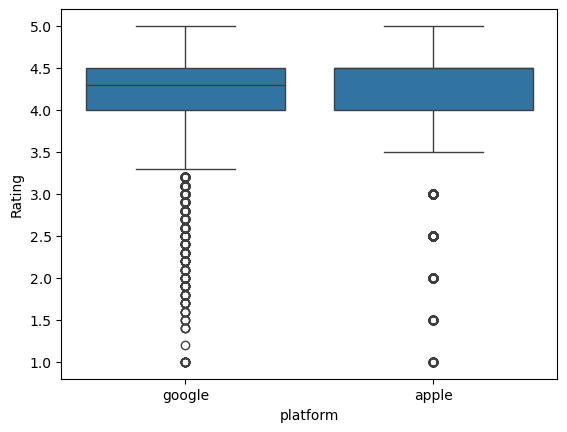

In [28]:
# Using the boxplot() method on our df.
import seaborn as sns
sns.boxplot(x = "platform", y = 'Rating', data = df)
plt.show()

Here we see the same information as in the analytical summary, but with a boxplot. 

## Stage 3 - Modelling

### 3a. Hypothesis formulation

Our **Null hypothesis** and **Alternate hypothesis are**:

**H<sub>null</sub>**: Observed difference in the mean rating of Apple Store and Google Play apps is due to chance (not platform specific).

**H<sub>alternative</sub>**: Observed difference in the average ratings of Apple and Google users is not due to chance (but due to platform)

Let us take the **significance level** to be 0.05. 

### 3b. Getting the distribution of the data
Now that the hypotheses and significance level are defined, we can select a statistical test to determine which hypothesis to accept. 

There are many different statistical tests, all with different assumptions. However, before applying any statistical test (in general), one of the most important thing to determine is the **distribution of the data**.   

In [29]:
# Create subsets of the dataset based on Google and Apple platform.
# Call the subsets 'apple' and 'google' 
apple = df[df['platform'] == 'apple']['Rating']
google = df[df['platform'] == 'google']['Rating']

In [30]:
# Using the stats.normaltest() method, let us see whether the apple data are normally distributed or not
# Save the result in a variable called apple_normal, and print it out
stats.normaltest(apple)

NormaltestResult(statistic=np.float64(1778.9974234584017), pvalue=np.float64(0.0))

In [31]:
# let us do the same with the google data. 
stats.normaltest(apple)

NormaltestResult(statistic=np.float64(1778.9974234584017), pvalue=np.float64(0.0))

**The null hypothesis of the normaltest() is that, the data are normally distributed, which means, lower the p-value in the result of this test, the more likely the data are to be non-normal.** 

**Since the p-values is 0 for both tests, regardless of what we pick for the significance level, our conclusion is that both apple & google datasets  are not normally distributed.**

To verify the non-normality of both datasets, we can also check the distribution of the data visually with a histogram. A normal distribution has the following visual characteristics:
    - symmetric
    - unimodal (one hump)
As well as a roughly identical mean, median and mode. 

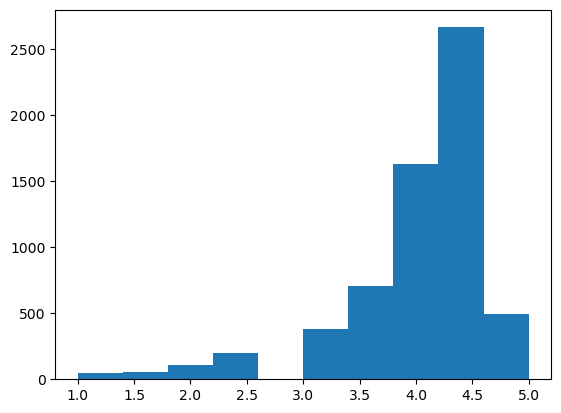

In [32]:
# Create a histogram of Apple apps ratings 
plt.hist(x = apple, bins = 10)
plt.show()

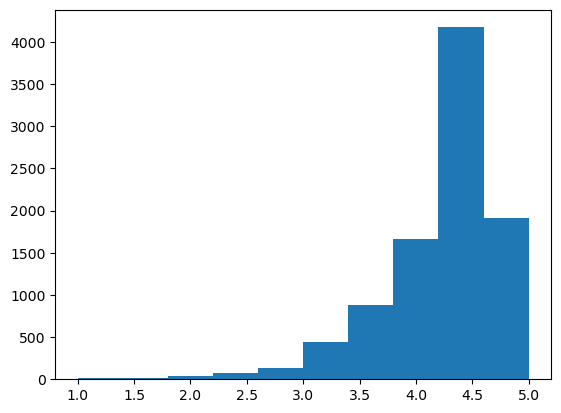

In [33]:
# Create a histogram of Google apps ratings
plt.hist(x = google, bins = 10)
plt.show()

### 3c. Permutation test
As data in both 'apple' and 'google' dataframes are not normally distributed, we'll use a **non-parametric test** (which is generally used when the data is not normally distributed).  

Check out more about permutations [here.](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/)

In [34]:
# Create a column called 'Permutation1', and assign to it the result of permuting (shuffling) the 'Rating' column
# This will be achived by the use of random.permutation() method
df['Permutation1'] = np.random.permutation(df['Rating'])
df.head()


,Category,Rating,Reviews,Price,platform,Permutation1
0,ART_AND_DESIGN,4.1,159,0.0,google,3.9
1,ART_AND_DESIGN,3.9,967,0.0,google,1.9
2,ART_AND_DESIGN,4.7,87510,0.0,google,3.8
3,ART_AND_DESIGN,4.5,215644,0.0,google,2.7
4,ART_AND_DESIGN,4.3,967,0.0,google,4.5


In [35]:
# Call describe() method on 'Permutation1' grouped by 'platform'. 
df.groupby('platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.134525,0.615935,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.134988,0.610982,1.0,4.0,4.3,4.5,5.0


**Let's calculate analytical summaries in both groups and comapre with previous one:**

In [36]:
print('Apple mean from permuation sample:', df.groupby('platform')['Permutation1'].describe().loc['apple', 'mean'])
print('Google mean from permuation sample:', df.groupby('platform')['Permutation1'].describe().loc['google', 'mean'] ) 

Apple mean from permuation sample: 4.134524569240587
Google mean from permuation sample: 4.134988255391844


In [37]:
4.139390555201021 - 4.131731795857356

0.007658759343664556

The difference in the means for Permutation1 now looks hugely different to our observed difference of 0.14206, and that the null hypotheis seems to be false; platform does impact on ratings.
But, to be sure, let's create 10,000 permutations, calculate the mean ratings for both Google and Apple apps, take difference between these, and then take the average of all of these differences.
Let's create a vector with the differences.

In [38]:
# First, make a list called difference.
difference = np.empty(10000)

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculate the difference of the mean rating for apple and the mean rating for google. 
for i in range(10000):
    df['Permutation1'] = np.random.permutation(df['Rating'])
    des = df.groupby('platform')['Permutation1'].describe()
    difference[i] = des.loc['apple', 'mean'] - des.loc['google', 'mean']

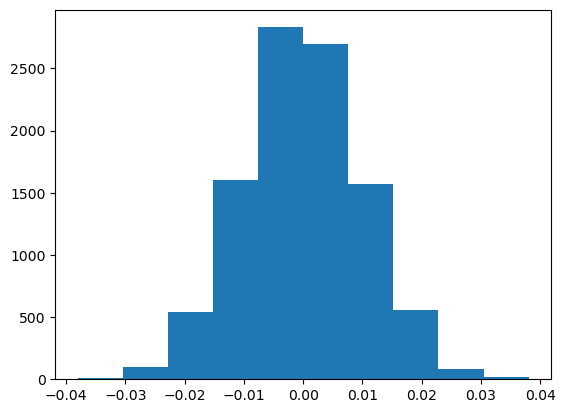

In [39]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo = plt.hist(difference, bins = 10)
plt.show()

In [40]:
# Now create a variable 'obs_difference', and assign the result of the difference of the mean of 'apple' and mean of 'google' variable 
obs_difference = np.mean(apple) - np.mean(google)
print(obs_difference)

# Make this difference absolute with the built-in abs() function. 
d = np.abs(obs_difference)
print(d)

-0.1420605474512291
0.1420605474512291


## Stage 4 -  Evaluating and concluding
### 4a. What is our conclusion?

Now, we'll count how many of the differences in our difference list are at least as extreme as our observed difference (i.e $ \geq 0.142 $), this will give us the p-value. <br>
If the p-value is less than or equal to 5%, we will reject the null hypothesis. 

In [41]:
p = np.sum(difference >= 0.142)/10000   
print('The p-value of the difference of the means in the permutation samples:', p)

The p-value of the difference of the means in the permutation samples: 0.0


### 4b. What is our decision?
We see that, zero differences are at least as extreme as our observed difference! That shows, the p-value of our observed difference (0.142) is 0. 

It doesn't matter which significance level we pick; our observed data is statistically significant, and we reject the null hypothesis.

So, we conclude that platform does impact on ratings. Specifically, based on these two datasets (obtained from Kaggle), we should advise our clients to integrate **Google Play store** into their operating system interface. 

### 4c. Other statistical tests.
The test we used here is the Permutation test. This was appropriate because our data were not normally distributed! 

There are many different statistical tests, all with different assumptions. A list of these tests are:
* One sample t-test
* Two independent samples t-test
* Paired t-test
* Chi-square test
* Chi-square goodness of fit test
* One-way ANOVA test etc.
